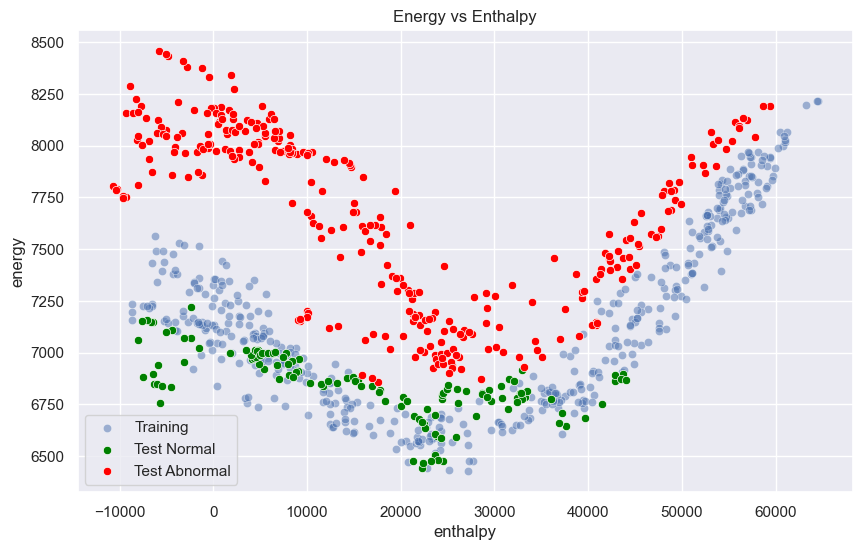

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("C:\\Users\\fsthilaire\Desktop\hd_energy_test\\data\\raw\\train_data.csv")
test_df = pd.read_csv("C:\\Users\\fsthilaire\\Desktop\\hd_energy_test\\data\\processed\\test_data_with_prediction.csv")

# Visual Assessment

sns.set_theme()
fig = plt.subplots(figsize=(10, 6))

ax1 = sns.scatterplot(data = train_df, x = 'enthalpy', y = 'energy', label = 'Training', alpha = 0.5)
ax2 = sns.scatterplot(data = test_df[test_df.prediction == 1], x = 'enthalpy', y = 'energy', label = 'Test Normal', color = 'green')
ax3 = sns.scatterplot(data = test_df[test_df.prediction == -1], x = 'enthalpy', y = 'energy', label = 'Test Abnormal', color = 'red')
_ = plt.title('Energy vs Enthalpy')

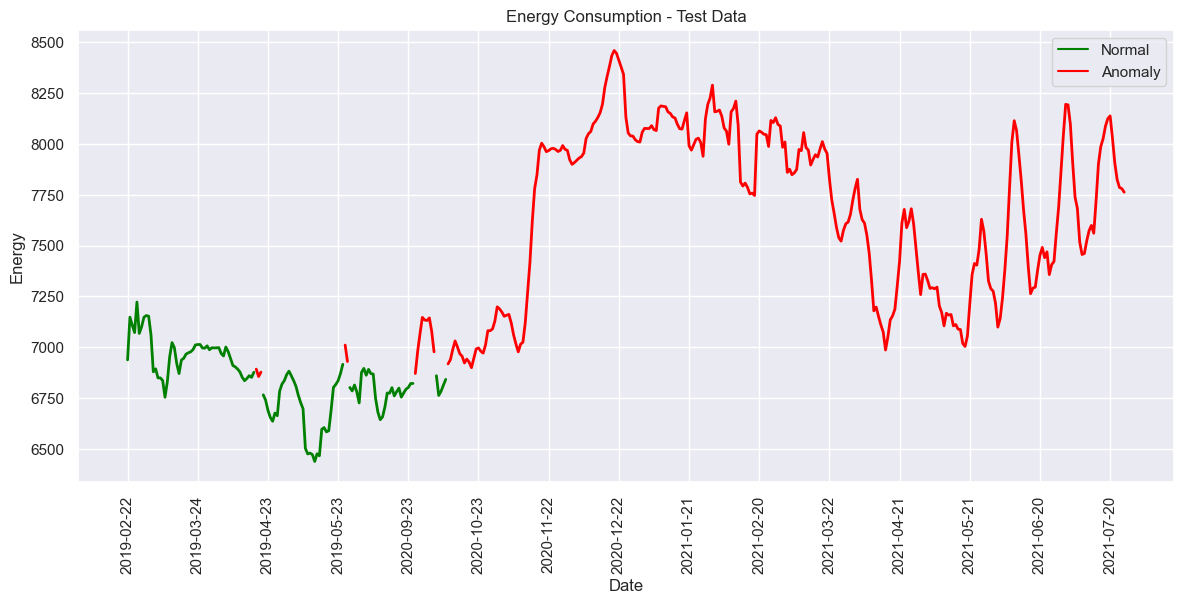

In [17]:


# Start figure
fig, ax = plt.subplots(figsize=(12, 6))

# Group consecutive points with the same label
for label, group in test_df.groupby((test_df['prediction'] != test_df['prediction'].shift()).cumsum()):
    color = 'red' if group['prediction'].iloc[0] == -1 else 'green'
    ax.plot(group['date'], group['energy'], color=color, linewidth=2)

ax.plot([], [], color='green', label='Normal')
ax.plot([], [], color='red', label='Anomaly')

ticks_to_use = test_df['date'].iloc[::30]
ax.set_xticks(ticks_to_use)
ax.tick_params(axis='x', labelrotation=90)
ax.legend()
_ = plt.ylabel('Energy')
_ = plt.xlabel('Date')
plt.tight_layout()
_ = plt.title('Energy Consumption - Test Data')